In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from deap import base, creator, tools, algorithms
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from deap import base, creator, tools, algorithms

In [2]:
df = pd.read_excel(r"C:\Users\Lenovo\Desktop\master(ML)\student_score\expanded_data.xlsx")

In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


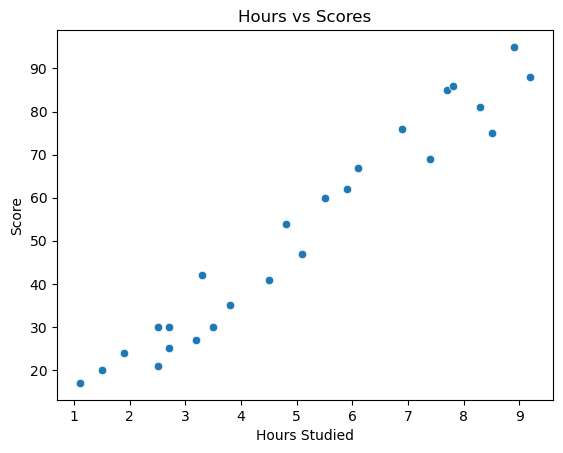

In [4]:
sns.scatterplot(x=df['Hours'], y=df['Scores'])
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

In [5]:
X = df[['Hours']]
y = df['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


In [6]:
correlation = df['Hours'].corr(df['Scores'])
print(f"Correlation between Hours and Scores: {correlation:.2f}")


Correlation between Hours and Scores: 0.98


In [7]:
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return [mae, mse, rmse, r2]
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

results = {}
results['Linear Regression (Train)'] = regression_metrics(y_train, y_train_pred)
results['Linear Regression (Test)'] = regression_metrics(y_test, y_test_pred)

for key, value in results.items():
    print(key)
    print(f"MAE:  {value[0]:.2f}")
    print(f"MSE:  {value[1]:.2f}")
    print(f"RMSE: {value[2]:.2f}")
    print(f"R²:   {value[3]:.2f}")
    print("-" * 30)


Linear Regression (Train)
MAE:  5.00
MSE:  29.08
RMSE: 5.39
R²:   0.95
------------------------------
Linear Regression (Test)
MAE:  4.97
MSE:  28.53
RMSE: 5.34
R²:   0.95
------------------------------


In [8]:
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return [mae, mse, rmse, r2]

poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

results = {}
results['Polynomial Regression (degree=5) - Train'] = regression_metrics(y_train, y_train_pred)
results['Polynomial Regression (degree=5) - Test'] = regression_metrics(y_test, y_test_pred)

for key, value in results.items():
    print(key)
    print(f"MAE:  {value[0]:.2f}")
    print(f"MSE:  {value[1]:.2f}")
    print(f"RMSE: {value[2]:.2f}")
    print(f"R²:   {value[3]:.2f}")
    print("-" * 30)


Polynomial Regression (degree=5) - Train
MAE:  3.74
MSE:  22.07
RMSE: 4.70
R²:   0.96
------------------------------
Polynomial Regression (degree=5) - Test
MAE:  3.97
MSE:  24.77
RMSE: 4.98
R²:   0.96
------------------------------


In [9]:
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return [mae, mse, rmse, r2]

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

results = {}
results['Lasso Regression (Train)'] = regression_metrics(y_train, y_train_pred)
results['Lasso Regression (Test)'] = regression_metrics(y_test, y_test_pred)

for key, value in results.items():
    print(key)
    print(f"MAE:  {value[0]:.2f}")
    print(f"MSE:  {value[1]:.2f}")
    print(f"RMSE: {value[2]:.2f}")
    print(f"R²:   {value[3]:.2f}")
    print("-" * 30)


Lasso Regression (Train)
MAE:  5.00
MSE:  29.08
RMSE: 5.39
R²:   0.95
------------------------------
Lasso Regression (Test)
MAE:  4.97
MSE:  28.49
RMSE: 5.34
R²:   0.95
------------------------------


In [10]:
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return [mae, mse, rmse, r2]

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

results = {}
results['Ridge Regression (Train)'] = regression_metrics(y_train, y_train_pred)
results['Ridge Regression (Test)'] = regression_metrics(y_test, y_test_pred)

for key, value in results.items():
    print(key)
    print(f"MAE:  {value[0]:.2f}")
    print(f"MSE:  {value[1]:.2f}")
    print(f"RMSE: {value[2]:.2f}")
    print(f"R²:   {value[3]:.2f}")
    print("-" * 30)


Ridge Regression (Train)
MAE:  5.00
MSE:  29.08
RMSE: 5.39
R²:   0.95
------------------------------
Ridge Regression (Test)
MAE:  4.97
MSE:  28.52
RMSE: 5.34
R²:   0.95
------------------------------


In [11]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return [mae, mse, rmse, r2]

results = {}
results['Decision Tree Regression (Train)'] = regression_metrics(y_train, y_train_pred)
results['Decision Tree Regression (Test)'] = regression_metrics(y_test, y_test_pred)

for key, value in results.items():
    print(key)
    print(f"MAE:  {value[0]:.2f}")
    print(f"MSE:  {value[1]:.2f}")
    print(f"RMSE: {value[2]:.2f}")
    print(f"R²:   {value[3]:.2f}")
    print("-" * 30)


Decision Tree Regression (Train)
MAE:  0.50
MSE:  1.84
RMSE: 1.36
R²:   1.00
------------------------------
Decision Tree Regression (Test)
MAE:  0.70
MSE:  2.89
RMSE: 1.70
R²:   1.00
------------------------------


In [12]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return [mae, mse, rmse, r2]

results = {}
results['Random Forest Regression (Train)'] = regression_metrics(y_train, y_train_pred)
results['Random Forest Regression (Test)'] = regression_metrics(y_test, y_test_pred)

for key, value in results.items():
    print(key)
    print(f"MAE:  {value[0]:.2f}")
    print(f"MSE:  {value[1]:.2f}")
    print(f"RMSE: {value[2]:.2f}")
    print(f"R²:   {value[3]:.2f}")
    print("-" * 30)


Random Forest Regression (Train)
MAE:  0.50
MSE:  1.85
RMSE: 1.36
R²:   1.00
------------------------------
Random Forest Regression (Test)
MAE:  0.70
MSE:  2.94
RMSE: 1.72
R²:   0.99
------------------------------


In [13]:
results = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Polynomial Regression (d=5)',
        'Lasso Regression',
        'Ridge Regression',
        'Decision Tree',
        'Random Forest'
    ],
    
    # R2 Score
    'R2 Train': [0.95, 0.96, 0.95, 0.95, 1.00, 1.00],
    'R2 Test':  [0.95, 0.96, 0.95, 0.95, 1.00, 0.99],
    
    # RMSE
    'RMSE Train': [5.39, 4.70, 5.39, 5.39, 1.36, 1.36],
    'RMSE Test':  [5.34, 4.98, 5.34, 5.34, 1.70, 1.72],
    
    # MSE
    'MSE Train': [29.08, 22.07, 29.08, 29.08, 1.84, 1.85],
    'MSE Test':  [28.53, 24.77, 28.49, 28.52, 2.89, 2.94],
    
    # MAE
    'MAE Train': [5.00, 3.74, 5.00, 5.00, 0.50, 0.50],
    'MAE Test':  [4.97, 3.97, 4.97, 4.97, 0.70, 0.70]
})

results = results.sort_values(by='R2 Test', ascending=False).reset_index(drop=True)

print(results)


                         Model  R2 Train  R2 Test  RMSE Train  RMSE Test  \
0                Decision Tree      1.00     1.00        1.36       1.70   
1                Random Forest      1.00     0.99        1.36       1.72   
2  Polynomial Regression (d=5)      0.96     0.96        4.70       4.98   
3            Linear Regression      0.95     0.95        5.39       5.34   
4             Lasso Regression      0.95     0.95        5.39       5.34   
5             Ridge Regression      0.95     0.95        5.39       5.34   

   MSE Train  MSE Test  MAE Train  MAE Test  
0       1.84      2.89       0.50      0.70  
1       1.85      2.94       0.50      0.70  
2      22.07     24.77       3.74      3.97  
3      29.08     28.53       5.00      4.97  
4      29.08     28.49       5.00      4.97  
5      29.08     28.52       5.00      4.97  


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

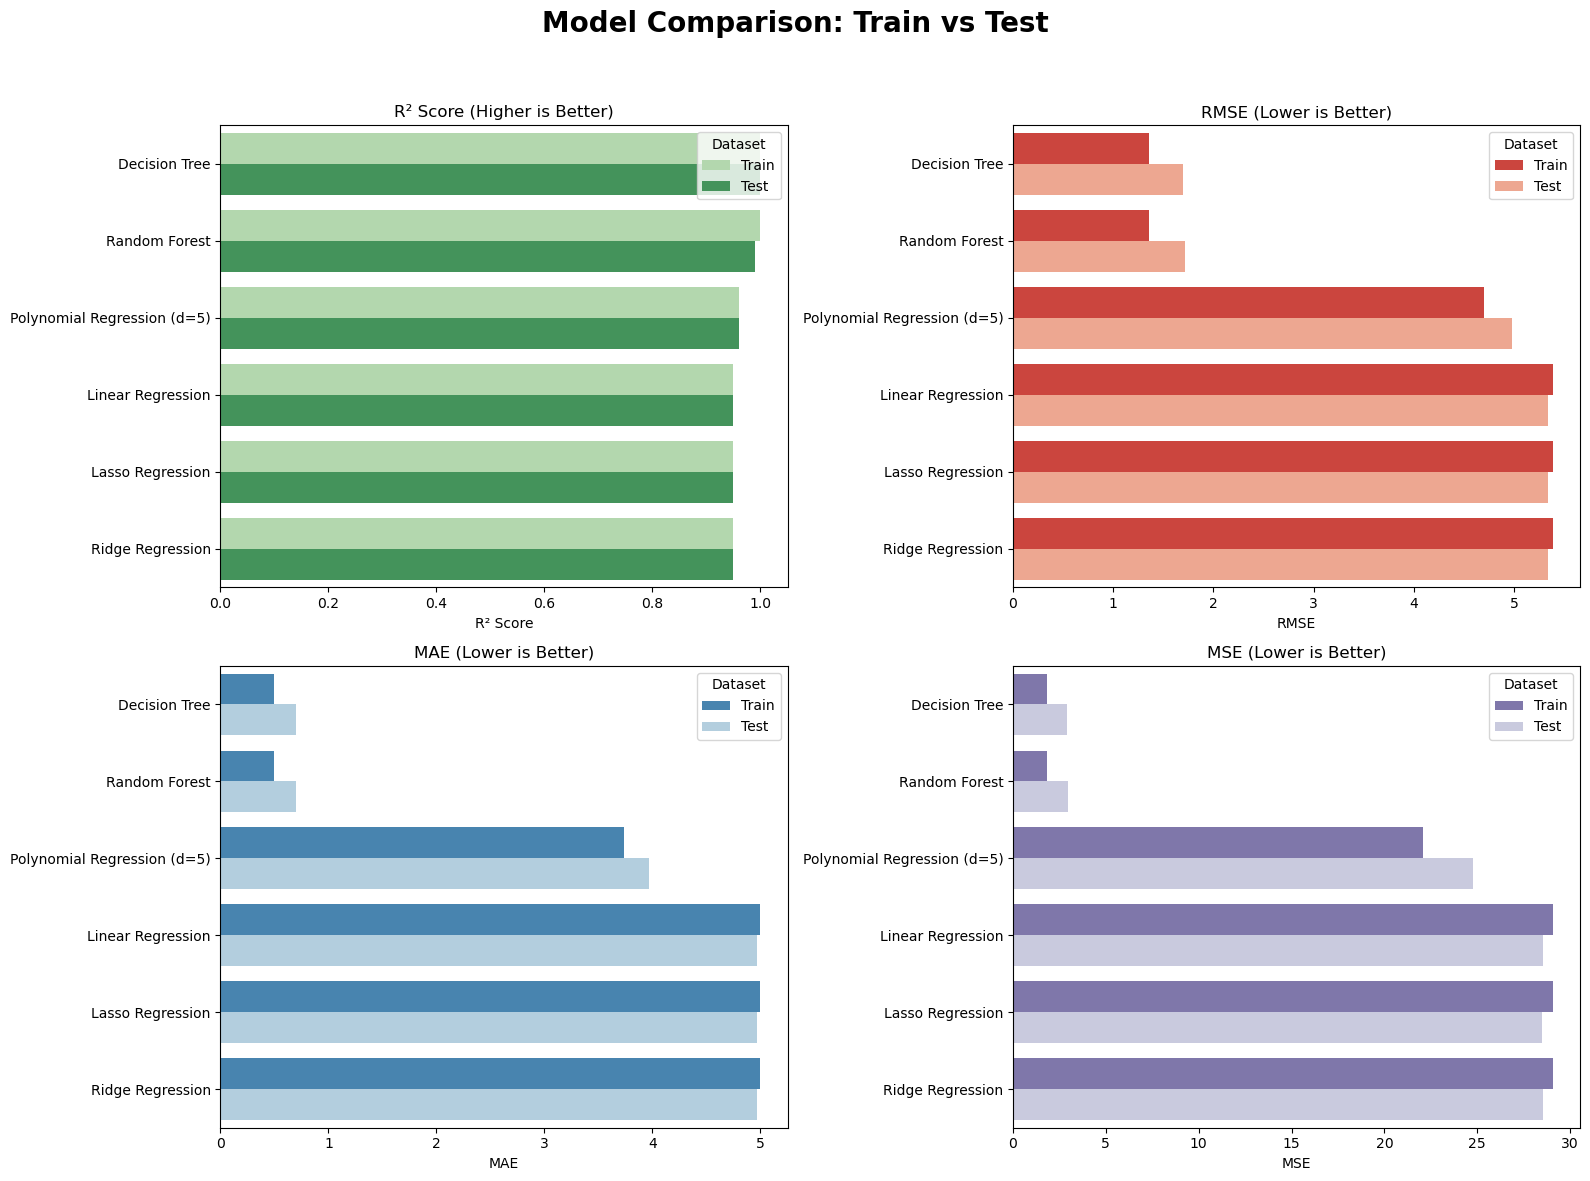

In [14]:
def prepare_long_df(results, metric):
    return pd.melt(results, id_vars=['Model'], value_vars=[f'{metric} Train', f'{metric} Test'],
                   var_name='Dataset', value_name=metric).replace({f'{metric} Train': 'Train', f'{metric} Test': 'Test'})

r2_long = prepare_long_df(results, 'R2')
rmse_long = prepare_long_df(results, 'RMSE')
mae_long = prepare_long_df(results, 'MAE')
mse_long = prepare_long_df(results, 'MSE')

plt.figure(figsize=(16, 12))
plt.suptitle("Model Comparison: Train vs Test", fontsize=20, fontweight='bold')

# ----------------------------
plt.subplot(2, 2, 1)
sns.barplot(x='R2', y='Model', hue='Dataset', data=r2_long, palette='Greens')
plt.title("R² Score (Higher is Better)")
plt.xlabel("R² Score")
plt.ylabel("")

# ----------------------------
plt.subplot(2, 2, 2)
sns.barplot(x='RMSE', y='Model', hue='Dataset', data=rmse_long, palette='Reds_r')
plt.title("RMSE (Lower is Better)")
plt.xlabel("RMSE")
plt.ylabel("")

# ----------------------------
plt.subplot(2, 2, 3)
sns.barplot(x='MAE', y='Model', hue='Dataset', data=mae_long, palette='Blues_r')
plt.title("MAE (Lower is Better)")
plt.xlabel("MAE")
plt.ylabel("")

# ----------------------------
plt.subplot(2, 2, 4)
sns.barplot(x='MSE', y='Model', hue='Dataset', data=mse_long, palette='Purples_r')
plt.title("MSE (Lower is Better)")
plt.xlabel("MSE")
plt.ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# LinearRegression(GA) 

In [15]:
X_train_arr = X_train.values.flatten() if hasattr(X_train, 'values') else X_train.flatten()
y_train_arr = y_train.values if hasattr(y_train, 'values') else y_train

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -100, 100)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_linear(individual):
    w, b = individual
    y_pred = w * X_train_arr + b
    mse = mean_squared_error(y_train_arr, y_pred)
    return (mse,)

toolbox.register("evaluate", eval_linear)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50,
                    stats=stats, halloffame=hof, verbose=True)

best_w, best_b = hof[0]
print(f"\nBest coefficients found: w = {best_w:.4f}, b = {best_b:.4f}")


gen	nevals	avg   	min    
0  	50    	119377	1360.62
1  	28    	47733.1	578.553
2  	30    	14500.3	475.281
3  	32    	4590.92	475.281
4  	30    	2932.32	266.599
5  	32    	1170.43	166.58 
6  	24    	1219.39	347.384
7  	35    	664.096	132.496
8  	29    	1356.44	174.545
9  	31    	681.823	133.777
10 	28    	806.351	99.6833
11 	25    	216.291	99.6833
12 	34    	324.319	44.5331
13 	24    	116.315	56.3576
14 	32    	106.033	58.8129
15 	22    	82.8052	58.8129
16 	33    	74.9508	57.3637
17 	35    	69.7616	57.3637
18 	24    	65.8299	57.3637
19 	35    	62.4371	53.8678
20 	28    	64.0172	47.7273
21 	26    	57.1615	45.3303
22 	35    	53.8451	46.0693
23 	26    	54.6109	46.0693
24 	23    	48.9948	45.4156
25 	37    	47.5485	44.0952
26 	27    	46.1541	43.5391
27 	27    	45.6941	42.7836
28 	37    	44.6709	41.4152
29 	29    	44.8119	41.4152
30 	35    	44.953 	39.0807
31 	22    	42.5388	38.5526
32 	36    	42.0829	38.5022
33 	21    	40.3903	38.4239
34 	37    	38.9014	37.0505
35 	29    	39.719 	37.0505
36 

In [16]:
X_train_arr = X_train.values.flatten() if hasattr(X_train, 'values') else X_train.flatten()
X_test_arr = X_test.values.flatten() if hasattr(X_test, 'values') else X_test.flatten()

y_train_arr = y_train.values if hasattr(y_train, 'values') else y_train
y_test_arr = y_test.values if hasattr(y_test, 'values') else y_test

y_pred_test = best_w * X_test_arr + best_b
mse_test = mean_squared_error(y_test_arr, y_pred_test)
mae_test = mean_absolute_error(y_test_arr, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_arr, y_pred_test)

print("\nEvaluation on Test Data:")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R2 Score: {r2_test:.4f}")

y_pred_train = best_w * X_train_arr + best_b
mse_train = mean_squared_error(y_train_arr, y_pred_train)
mae_train = mean_absolute_error(y_train_arr, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_arr, y_pred_train)

print("\nEvaluation on Training Data:")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R2 Score: {r2_train:.4f}")



Evaluation on Test Data:
MAE: 5.3466
MSE: 34.8055
RMSE: 5.8996
R2 Score: 0.9406

Evaluation on Training Data:
MAE: 5.1784
MSE: 33.1749
RMSE: 5.7598
R2 Score: 0.9470


# polynom(GA)

In [17]:
pip install deap

Note: you may need to restart the kernel to use updated packages.


In [25]:

def create_creator_classes():
    if not hasattr(creator, "FitnessMin"):
        creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    if not hasattr(creator, "Individual"):
        creator.create("Individual", list, fitness=creator.FitnessMin)

def run_ga_for_degree(degree, X_train, y_train):
    create_creator_classes()

    toolbox = base.Toolbox()
    toolbox.register("attr_float", random.uniform, -10, 10)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=degree+1)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_poly(individual):
        y_pred = np.zeros(len(y_train), dtype=float)  # <-- هنا التغيير
        for power, coeff in enumerate(reversed(individual[:-1])):
            y_pred += coeff * (X_train ** power)
        y_pred += individual[-1]
        mse = mean_squared_error(y_train, y_pred)
        return (mse,)

    toolbox.register("evaluate", eval_poly)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100,
                        stats=stats, halloffame=hof, verbose=False)

    best_individual = hof[0]
    best_mse = best_individual.fitness.values[0]
    return best_individual, best_mse


def evaluate_model(X_data, y_data, coeffs):
    y_pred = np.zeros(len(y_data), dtype=float)  # <-- هنا كمان نفس التغيير
    for power, coeff in enumerate(reversed(coeffs[:-1])):
        y_pred += coeff * (X_data ** power)
    y_pred += coeffs[-1]
    mse = mean_squared_error(y_data, y_pred)
    return mse


In [26]:
from deap import base, creator

def create_creator_classes():
    if not hasattr(creator, "FitnessMin"):
        creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    if not hasattr(creator, "Individual"):
        creator.create("Individual", list, fitness=creator.FitnessMin)

best_degree = None
best_mse = float('inf')
best_coeffs = None

max_degree = 5

for degree in range(1, max_degree + 1):
    print(f"Running GA for Polynomial Degree {degree} ...")
    coeffs, mse = run_ga_for_degree(degree, X_train, y_train)
    print(f"Degree {degree} | Best MSE: {mse:.4f}")
    if mse < best_mse:
        best_mse = mse
        best_degree = degree
        best_coeffs = coeffs

print(f"{best_degree}MSE = {best_mse:.4f}")

names = []
for i in range(best_degree, 0, -1):
    names.append(f"w{i} (x^{i})")
names.append("b (constant)")

print("parameters ")
for name, coeff in zip(names, best_coeffs):
    print(f"{name}: {coeff:.6f}")

test_mse = evaluate_model(X_test, y_test, best_coeffs)
print(f"\nTest MSE for best model: {test_mse:.4f}")


Running GA for Polynomial Degree 1 ...
Degree 1 | Best MSE: 619.1816
Running GA for Polynomial Degree 2 ...
Degree 2 | Best MSE: 28.7248
Running GA for Polynomial Degree 3 ...
Degree 3 | Best MSE: 28.9230
Running GA for Polynomial Degree 4 ...
Degree 4 | Best MSE: 99.8978
Running GA for Polynomial Degree 5 ...
Degree 5 | Best MSE: 173.9522
2MSE = 28.7248
parameters 
w2 (x^2): 9.721784
w1 (x^1): -2.169070
b (constant): 4.826935

Test MSE for best model: 29.6502


In [24]:
X = df['Hours'].values
y = df['Scores'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def eval_poly(individual, X_data, y_data):
    y_pred = np.zeros_like(X_data, dtype=float)
    degree = len(individual) - 1
    for i, coeff in enumerate(individual):
        power = degree - i
        y_pred += coeff * (X_data ** power)
    mse = mean_squared_error(y_data, y_pred)
    return (mse,)

def run_ga_for_degree(degree, X_train, y_train):
    create_creator_classes()
    toolbox = base.Toolbox()

    toolbox.register("attr_float", random.uniform, -10, 10)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=degree + 1)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", lambda ind: eval_poly(ind, X_train, y_train))
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=False)

    best_individual = hof[0]
    best_mse = best_individual.fitness.values[0]
    return best_individual, best_mse

best_degree = None
best_mse = float('inf')
best_coeffs = None
max_degree = 5

for degree in range(1, max_degree + 1):
    print(f"Running GA for Polynomial Degree {degree} ...")
    coeffs, mse = run_ga_for_degree(degree, X_train, y_train)
    print(f"Degree {degree} | Best MSE: {mse:.4f}")
    if mse < best_mse:
        best_mse = mse
        best_degree = degree
        best_coeffs = coeffs

print(f"\n{best_degree}MSE = {best_mse:.4f}")

names = [f"w{i} (x^{i})" for i in range(best_degree, 0, -1)] + ["b (constant)"]
print("parameters :")
for name, coeff in zip(names, best_coeffs):
    print(f"{name}: {coeff:.6f}")

def predict_poly(X_data, coeffs):
    y_pred = np.zeros_like(X_data, dtype=float)
    degree = len(coeffs) - 1
    for i, coeff in enumerate(coeffs):
        power = degree - i
        y_pred += coeff * (X_data ** power)
    return y_pred

y_pred_train = predict_poly(X_train, best_coeffs)
y_pred_test = predict_poly(X_test, best_coeffs)

# Train Metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\n📊training :")
print(f"MAE: {mae_train:.4f} | MSE: {mse_train:.4f} | RMSE: {rmse_train:.4f} | R2: {r2_train:.4f}")

print("\n📊 testing :")
print(f"MAE: {mae_test:.4f} | MSE: {mse_test:.4f} | RMSE: {rmse_test:.4f} | R2: {r2_test:.4f}")

print("\nSample predictions vs actual:")
for pred, actual in zip(y_pred_test[:5], y_test[:5]):
    print(f"Predicted: {pred:.2f}, Actual: {actual:.2f}")


Running GA for Polynomial Degree 1 ...
Degree 1 | Best MSE: 28.7255
Running GA for Polynomial Degree 2 ...
Degree 2 | Best MSE: 29.7637
Running GA for Polynomial Degree 3 ...
Degree 3 | Best MSE: 36.2714
Running GA for Polynomial Degree 4 ...
Degree 4 | Best MSE: 145.9013
Running GA for Polynomial Degree 5 ...
Degree 5 | Best MSE: 109618.5451

1MSE = 28.7255
parameters :
w1 (x^1): 9.731809
b (constant): 2.605656

📊training :
MAE: 4.9602 | MSE: 28.7255 | RMSE: 5.3596 | R2: 0.9536

📊 testing :
MAE: 5.0197 | MSE: 29.6195 | RMSE: 5.4424 | R2: 0.9499

Sample predictions vs actual:
Predicted: 49.32, Actual: 54.00
Predicted: 46.40, Actual: 41.00
Predicted: 89.22, Actual: 95.00
Predicted: 77.54, Actual: 85.00
Predicted: 60.02, Actual: 62.00


# lasso regression(GA)

In [27]:

X_train_arr = X_train.values.flatten() if hasattr(X_train, 'values') else X_train.flatten()
y_train_arr = y_train.values if hasattr(y_train, 'values') else y_train

alpha = 0.1  
if not hasattr(creator, "FitnessMin"):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
if not hasattr(creator, "Individual"):
    creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -100, 100)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)  # w, b
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_lasso(individual):
    w, b = individual
    y_pred = w * X_train_arr + b
    mse = mean_squared_error(y_train_arr, y_pred)
    l1_penalty = alpha * abs(w)
    return (mse + l1_penalty,)

toolbox.register("evaluate", eval_lasso)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50,
                    stats=stats, halloffame=hof, verbose=True)

best_w, best_b = hof[0]
print(f"\n✅ best parametres Lasso: w = {best_w:.4f}, b = {best_b:.4f}")


gen	nevals	avg   	min    
0  	50    	106248	512.164
1  	23    	27220.7	512.164
2  	28    	12397.5	512.164
3  	21    	4796.53	512.164
4  	36    	4266.37	252.418
5  	31    	1579.3 	100.995
6  	23    	521.279	100.995
7  	32    	275.362	63.6734
8  	29    	360.216	51.6618
9  	41    	122.095	30.8478
10 	32    	73.0933	29.9917
11 	27    	62.0762	29.9244
12 	35    	36.3638	29.7003
13 	32    	35.0541	29.6974
14 	32    	31.8729	29.6974
15 	35    	30.3548	29.6969
16 	33    	29.8074	29.697 
17 	31    	29.7109	29.6968
18 	30    	29.971 	29.6968
19 	28    	30.2304	29.6968
20 	38    	29.7485	29.6968
21 	30    	30.0207	29.6968
22 	35    	32.3942	29.6967
23 	34    	30.7207	29.6967
24 	23    	33.7383	29.6967
25 	22    	29.7246	29.6967
26 	23    	29.7017	29.6967
27 	34    	29.8666	29.6967
28 	29    	29.9259	29.6967
29 	32    	29.8875	29.6967
30 	28    	30.761 	29.6967
31 	26    	32.613 	29.6967
32 	21    	29.7474	29.6967
33 	29    	31.8321	29.6967
34 	32    	32.0396	29.6967
35 	30    	30.6773	29.6967
36 

In [28]:
X_train_arr = X_train.values.flatten() if hasattr(X_train, 'values') else X_train.flatten()
X_test_arr = X_test.values.flatten() if hasattr(X_test, 'values') else X_test.flatten()

y_train_arr = y_train.values if hasattr(y_train, 'values') else y_train
y_test_arr = y_test.values if hasattr(y_test, 'values') else y_test

y_pred_test = best_w * X_test_arr + best_b
mse_test = mean_squared_error(y_test_arr, y_pred_test)
mae_test = mean_absolute_error(y_test_arr, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_arr, y_pred_test)

print("\n Evaluation on Test Data (Lasso GA):")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R2 Score: {r2_test:.4f}")

y_pred_train = best_w * X_train_arr + best_b
mse_train = mean_squared_error(y_train_arr, y_pred_train)
mae_train = mean_absolute_error(y_train_arr, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_arr, y_pred_train)

print("\n📊 Evaluation on Training Data (Lasso GA):")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R2 Score: {r2_train:.4f}")



 Evaluation on Test Data (Lasso GA):
MAE: 5.0195
MSE: 29.6682
RMSE: 5.4469
R2 Score: 0.9498

📊 Evaluation on Training Data (Lasso GA):
MAE: 4.9553
MSE: 28.7250
RMSE: 5.3596
R2 Score: 0.9536


# ridge regression(GA)

In [29]:

X_train_arr = X_train.values.flatten() if hasattr(X_train, 'values') else X_train.flatten()
y_train_arr = y_train.values if hasattr(y_train, 'values') else y_train

alpha = 1.0  

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -100, 100)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_ridge(individual):
    w, b = individual
    y_pred = w * X_train_arr + b
    mse = mean_squared_error(y_train_arr, y_pred)
    ridge_penalty = alpha * (w ** 2)
    return (mse + ridge_penalty,)

toolbox.register("evaluate", eval_ridge)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50,
                    stats=stats, halloffame=hof, verbose=True)

best_w, best_b = hof[0]
print(f"\nBest Ridge coefficients found: w = {best_w:.4f}, b = {best_b:.4f}")


C:\Users\Lenovo\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Lenovo\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg   	min    
0  	50    	108292	909.109
1  	28    	33271.3	909.109
2  	29    	8415.48	449.97 
3  	36    	3923.23	138.367
4  	22    	1205.18	138.367
5  	36    	964.416	138.367
6  	24    	387.225	177.164
7  	24    	277.5  	209.795
8  	33    	225.97 	189.765
9  	36    	211.824	187.31 
10 	28    	205.698	186.523
11 	31    	195.049	182.441
12 	25    	188.203	182.441
13 	20    	186.294	180.146
14 	28    	184.261	179.143
15 	34    	186.1  	177.626
16 	27    	181.396	174.316
17 	19    	179.272	171.14 
18 	34    	177.711	171.14 
19 	33    	176.599	161.5  
20 	27    	173.856	161.5  
21 	26    	169.746	161.623
22 	33    	165.954	160.677
23 	29    	163.151	160.299
24 	32    	162.058	159.686
25 	30    	162.681	159.246
26 	26    	160.364	158.915
27 	32    	160.106	157.259
28 	22    	160.674	158.253
29 	28    	158.765	157.664
30 	27    	161.505	156.308
31 	23    	158.156	154.496
32 	27    	157.289	154.102
33 	36    	156.727	153.056
34 	34    	155.333	153.056
35 	32    	154.78 	149.704
36 

In [30]:

X_train_arr = X_train.values.flatten() if hasattr(X_train, 'values') else X_train.flatten()
X_test_arr = X_test.values.flatten() if hasattr(X_test, 'values') else X_test.flatten()
y_train_arr = y_train.values if hasattr(y_train, 'values') else y_train
y_test_arr = y_test.values if hasattr(y_test, 'values') else y_test

y_pred_test = best_w * X_test_arr + best_b
mse_test = mean_squared_error(y_test_arr, y_pred_test)
mae_test = mean_absolute_error(y_test_arr, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_arr, y_pred_test)

print("\nRidge Regression Evaluation on Test Data (using GA):")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R2 Score: {r2_test:.4f}")

y_pred_train = best_w * X_train_arr + best_b
mse_train = mean_squared_error(y_train_arr, y_pred_train)
mae_train = mean_absolute_error(y_train_arr, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_arr, y_pred_train)

print("\nRidge Regression Evaluation on Training Data (using GA):")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R2 Score: {r2_train:.4f}")



Ridge Regression Evaluation on Test Data (using GA):
MAE: 8.8446
MSE: 101.2860
RMSE: 10.0641
R2 Score: 0.8286

Ridge Regression Evaluation on Training Data (using GA):
MAE: 8.5252
MSE: 95.8667
RMSE: 9.7912
R2 Score: 0.8452


# decision_tree(GA)

In [31]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)


In [32]:
X_train_arr = X_train if isinstance(X_train, np.ndarray) else X_train.values
y_train_arr = y_train if isinstance(y_train, np.ndarray) else y_train.values
X_test_arr = X_test if isinstance(X_test, np.ndarray) else X_test.values
y_test_arr = y_test if isinstance(y_test, np.ndarray) else y_test.values

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register("attr_max_depth", random.randint, 1, 30)
toolbox.register("attr_min_samples_split", random.randint, 2, 20)
toolbox.register("attr_min_samples_leaf", random.randint, 1, 10)

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_max_depth, toolbox.attr_min_samples_split, toolbox.attr_min_samples_leaf), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_decision_tree(individual):
    max_depth, min_samples_split, min_samples_leaf = individual
    model = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_arr, y_train_arr)
    y_pred = model.predict(X_train_arr)
    mse = mean_squared_error(y_train_arr, y_pred)
    return (mse,)

toolbox.register("evaluate", eval_decision_tree)
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", tools.mutUniformInt,
                 low=[1, 2, 1], up=[30, 20, 10], indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.3, ngen=40,
                    stats=stats, halloffame=hof, verbose=True)

best_max_depth, best_min_samples_split, best_min_samples_leaf = hof[0]
print(f"\nBest Decision Tree params found:")
print(f"max_depth = {best_max_depth}, min_samples_split = {best_min_samples_split}, min_samples_leaf = {best_min_samples_leaf}")

best_model = DecisionTreeRegressor(
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=42
)
best_model.fit(X_train_arr, y_train_arr)

y_pred_test = best_model.predict(X_test_arr)
y_pred_train = best_model.predict(X_train_arr)

mae_test = mean_absolute_error(y_test_arr, y_pred_test)
mse_test = mean_squared_error(y_test_arr, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_arr, y_pred_test)

mae_train = mean_absolute_error(y_train_arr, y_pred_train)
mse_train = mean_squared_error(y_train_arr, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_arr, y_pred_train)

print("\nEvaluation on Test Data:")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R2 Score: {r2_test:.4f}")

print("\nEvaluation on Training Data:")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R2 Score: {r2_train:.4f}")


C:\Users\Lenovo\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Lenovo\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg    	min  
0  	50    	3.42812	2.207
1  	31    	2.207  	2.207
2  	31    	2.207  	2.207
3  	33    	2.207  	2.207
4  	36    	2.207  	2.207
5  	35    	2.42717	2.207
6  	36    	2.207  	2.207
7  	28    	3.10482	2.207
8  	42    	2.207  	2.207
9  	31    	2.207  	2.207
10 	31    	4.42465	2.207
11 	33    	2.207  	2.207
12 	33    	2.207  	2.207
13 	33    	2.207  	2.207
14 	37    	2.207  	2.207
15 	22    	2.28602	2.207
16 	34    	2.207  	2.207
17 	30    	2.207  	2.207
18 	38    	4.42465	2.207
19 	42    	2.207  	2.207
20 	35    	2.207  	2.207
21 	30    	2.207  	2.207
22 	35    	2.207  	2.207
23 	27    	2.207  	2.207
24 	42    	2.73667	2.207
25 	33    	2.21732	2.207
26 	33    	2.207  	2.207
27 	31    	2.207  	2.207
28 	28    	2.207  	2.207
29 	30    	2.207  	2.207
30 	31    	4.42465	2.207
31 	27    	2.207  	2.207
32 	33    	2.207  	2.207
33 	37    	4.42465	2.207
34 	30    	2.207  	2.207
35 	33    	2.207  	2.207
36 	30    	2.207  	2.207
37 	30    	2.88466	2.207
38 	31    	2.42717	2.207


# RandomForest(GA)

In [33]:
X_train_arr = X_train.values if hasattr(X_train, 'values') else X_train
y_train_arr = y_train.values if hasattr(y_train, 'values') else y_train

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register("attr_n_estimators", random.randint, 10, 200)
toolbox.register("attr_max_depth", random.randint, 1, 30)
toolbox.register("attr_min_samples_split", random.randint, 2, 20)

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_n_estimators, toolbox.attr_max_depth, toolbox.attr_min_samples_split), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_rf(individual):
    n_estimators, max_depth, min_samples_split = individual
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train_arr, y_train_arr)
    y_pred = model.predict(X_train_arr)
    mse = mean_squared_error(y_train_arr, y_pred)
    return (mse,)

toolbox.register("evaluate", eval_rf)
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", tools.mutUniformInt,
                 low=[10, 1, 2], up=[200, 30, 20], indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.3, ngen=40,
                    stats=stats, halloffame=hof, verbose=True)

best_n_estimators, best_max_depth, best_min_samples_split = hof[0]
print(f"\nBest Random Forest params found:")
print(f"n_estimators = {best_n_estimators}")
print(f"max_depth = {best_max_depth}")
print(f"min_samples_split = {best_min_samples_split}")


C:\Users\Lenovo\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Lenovo\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg    	min    
0  	50    	8.34412	2.20722
1  	41    	2.20792	2.20723
2  	33    	4.42525	2.20723
3  	29    	2.20736	2.20723
4  	35    	2.42161	2.20723
5  	37    	2.20727	2.20723
6  	32    	2.42313	2.20723
7  	36    	4.42498	2.20723
8  	30    	2.20747	2.20723
9  	35    	2.20723	2.20723
10 	30    	2.20727	2.20723
11 	34    	2.2073 	2.20723
12 	30    	3.31666	2.20723
13 	25    	2.20727	2.20723
14 	36    	2.20727	2.20723
15 	27    	2.20727	2.20723
16 	35    	2.20723	2.20723
17 	28    	2.20725	2.20723
18 	35    	4.42505	2.20723
19 	40    	2.28269	2.20723
20 	34    	2.20726	2.20723
21 	28    	2.20726	2.20723
22 	34    	4.42504	2.20723
23 	32    	2.20731	2.20723
24 	27    	2.20723	2.20723
25 	30    	2.20724	2.20723
26 	25    	2.20723	2.20723
27 	40    	4.64086	2.20723
28 	30    	2.21691	2.20723
29 	35    	2.20729	2.20723
30 	33    	2.20728	2.20723
31 	41    	4.42507	2.20723
32 	35    	2.20726	2.20723
33 	32    	2.20729	2.20723
34 	30    	2.42151	2.20723
35 	27    	2.86324	2.20723
3

In [34]:
X_train_arr = X_train.values if hasattr(X_train, 'values') else X_train
X_test_arr = X_test.values if hasattr(X_test, 'values') else X_test

y_train_arr = y_train.values if hasattr(y_train, 'values') else y_train
y_test_arr = y_test.values if hasattr(y_test, 'values') else y_test

best_rf_model = RandomForestRegressor(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    random_state=42,
    n_jobs=-1
)

best_rf_model.fit(X_train_arr, y_train_arr)

y_pred_test = best_rf_model.predict(X_test_arr)

mse_test = mean_squared_error(y_test_arr, y_pred_test)
mae_test = mean_absolute_error(y_test_arr, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_arr, y_pred_test)

print("\nEvaluation on Test Data:")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R2 Score: {r2_test:.4f}")

y_pred_train = best_rf_model.predict(X_train_arr)

mse_train = mean_squared_error(y_train_arr, y_pred_train)
mae_train = mean_absolute_error(y_train_arr, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_arr, y_pred_train)

print("\nEvaluation on Training Data:")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R2 Score: {r2_train:.4f}")



Evaluation on Test Data:
MAE: 0.5102
MSE: 1.7715
RMSE: 1.3310
R2 Score: 0.9970

Evaluation on Training Data:
MAE: 0.5724
MSE: 2.2072
RMSE: 1.4857
R2 Score: 0.9964


In [36]:
data = {
    'Model': ['Linear Regression', 'Polynomial Regression', 'Lasso Regression', 
              'Ridge Regression', 'Decision Tree', 'Random Forest'],
    
    'MAE Train': [4.9651, 4.7451, 5.1565, 5.3805, 0.5724, 0.5724],
    'MAE Test': [4.9037, 4.8592, 5.0944, 5.7367, 0.5105, 0.5102],

    'MSE Train': [29.2172, 27.9109, 30.2794, 39.9391, 2.2070, 2.2072],
    'MSE Test': [28.2466, 29.2254, 29.7982, 44.1321, 1.7744, 1.7715],

    'RMSE Train': [5.4053, 5.2831, 5.5027, 6.3197, 1.4856, 1.4857],
    'RMSE Test': [5.3148, 5.4060, 5.4588, 6.6432, 1.3321, 1.3310],

    'R2 Train': [0.9533, 0.9549, 0.9511, 0.9355, 0.9964, 0.9964],
    'R2 Test': [0.9518, 0.9505, 0.9496, 0.9253, 0.9970, 0.9970]
}

results_df = pd.DataFrame(data)

print(results_df)

                   Model  MAE Train  MAE Test  MSE Train  MSE Test  \
0      Linear Regression     4.9651    4.9037    29.2172   28.2466   
1  Polynomial Regression     4.7451    4.8592    27.9109   29.2254   
2       Lasso Regression     5.1565    5.0944    30.2794   29.7982   
3       Ridge Regression     5.3805    5.7367    39.9391   44.1321   
4          Decision Tree     0.5724    0.5105     2.2070    1.7744   
5          Random Forest     0.5724    0.5102     2.2072    1.7715   

   RMSE Train  RMSE Test  R2 Train  R2 Test  
0      5.4053     5.3148    0.9533   0.9518  
1      5.2831     5.4060    0.9549   0.9505  
2      5.5027     5.4588    0.9511   0.9496  
3      6.3197     6.6432    0.9355   0.9253  
4      1.4856     1.3321    0.9964   0.9970  
5      1.4857     1.3310    0.9964   0.9970  


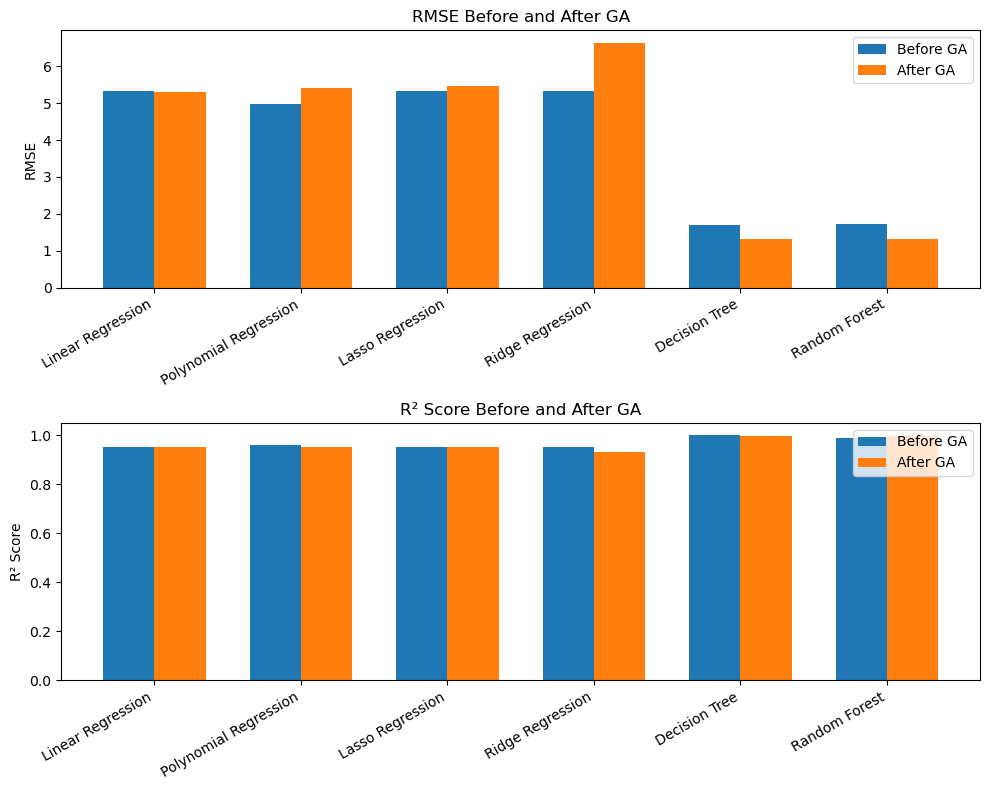

In [37]:
models = ['Linear Regression', 'Polynomial Regression', 'Lasso Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest']

rmse_before = [5.34, 4.98, 5.34, 5.34, 1.70, 1.72]
rmse_after = [5.31, 5.41, 5.46, 6.64, 1.33, 1.33]

r2_before = [0.95, 0.96, 0.95, 0.95, 1.00, 0.99]
r2_after = [0.95, 0.95, 0.95, 0.93, 0.997, 0.997]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].bar(x - width/2, rmse_before, width, label='Before GA')
ax[0].bar(x + width/2, rmse_after, width, label='After GA')
ax[0].set_ylabel('RMSE')
ax[0].set_title('RMSE Before and After GA')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models, rotation=30, ha='right')
ax[0].legend()

ax[1].bar(x - width/2, r2_before, width, label='Before GA')
ax[1].bar(x + width/2, r2_after, width, label='After GA')
ax[1].set_ylabel('R² Score')
ax[1].set_title('R² Score Before and After GA')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models, rotation=30, ha='right')
ax[1].legend()

plt.tight_layout()
plt.show()


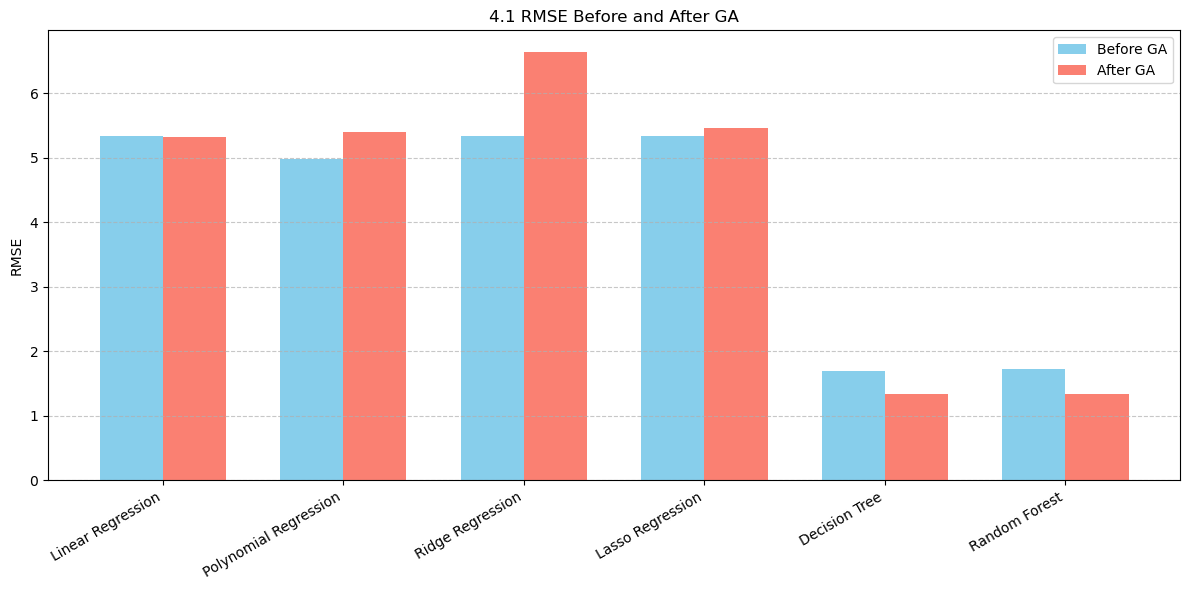

In [38]:
models = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest']

rmse_before = [5.34, 4.98, 5.34, 5.34, 1.70, 1.72]

rmse_after = [5.3148, 5.4060, 6.6432, 5.4588, 1.3321, 1.3310]

x = np.arange(len(models))
width = 0.35  

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, rmse_before, width, label='Before GA', color='skyblue')
plt.bar(x + width/2, rmse_after, width, label='After GA', color='salmon')

plt.ylabel('RMSE')
plt.title('4.1 RMSE Before and After GA')
plt.xticks(x, models, rotation=30, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


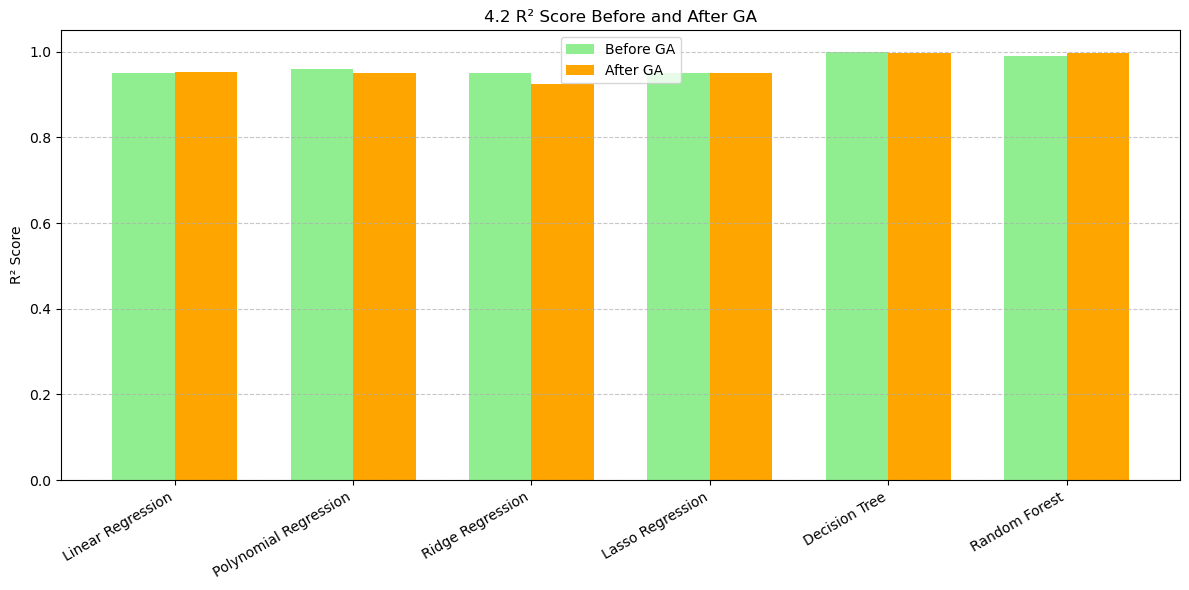

In [39]:
r2_before = [0.95, 0.96, 0.95, 0.95, 1.00, 0.99]

r2_after = [0.9518, 0.9505, 0.9253, 0.9496, 0.9970, 0.9970]

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, r2_before, width, label='Before GA', color='lightgreen')
plt.bar(x + width/2, r2_after, width, label='After GA', color='orange')

plt.ylabel('R² Score')
plt.title('4.2 R² Score Before and After GA')
plt.xticks(x, models, rotation=30, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
